In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.cluster import KMeans

In [5]:
df=pd.read_csv("cardio_train.csv",
sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

In [7]:
print(df.isnull().sum())

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [8]:
print(df.describe())

                age        gender        height        weight         ap_hi  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   19468.865814      1.349571    164.359229     74.205690    128.817286   
std     2467.251667      0.476838      8.210126     14.395757    154.011419   
min    10798.000000      1.000000     55.000000     10.000000   -150.000000   
25%    17664.000000      1.000000    159.000000     65.000000    120.000000   
50%    19703.000000      1.000000    165.000000     72.000000    120.000000   
75%    21327.000000      2.000000    170.000000     82.000000    140.000000   
max    23713.000000      2.000000    250.000000    200.000000  16020.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      96.630414      1.366871      1.226457      0.088129      0.053771   
std      188.472530      0.680250      0.572270    

In [9]:
x = df.drop('cardio',axis=1)
y =df['cardio']

In [10]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(
    x_scaled,y,test_size=0.2,random_state=42)

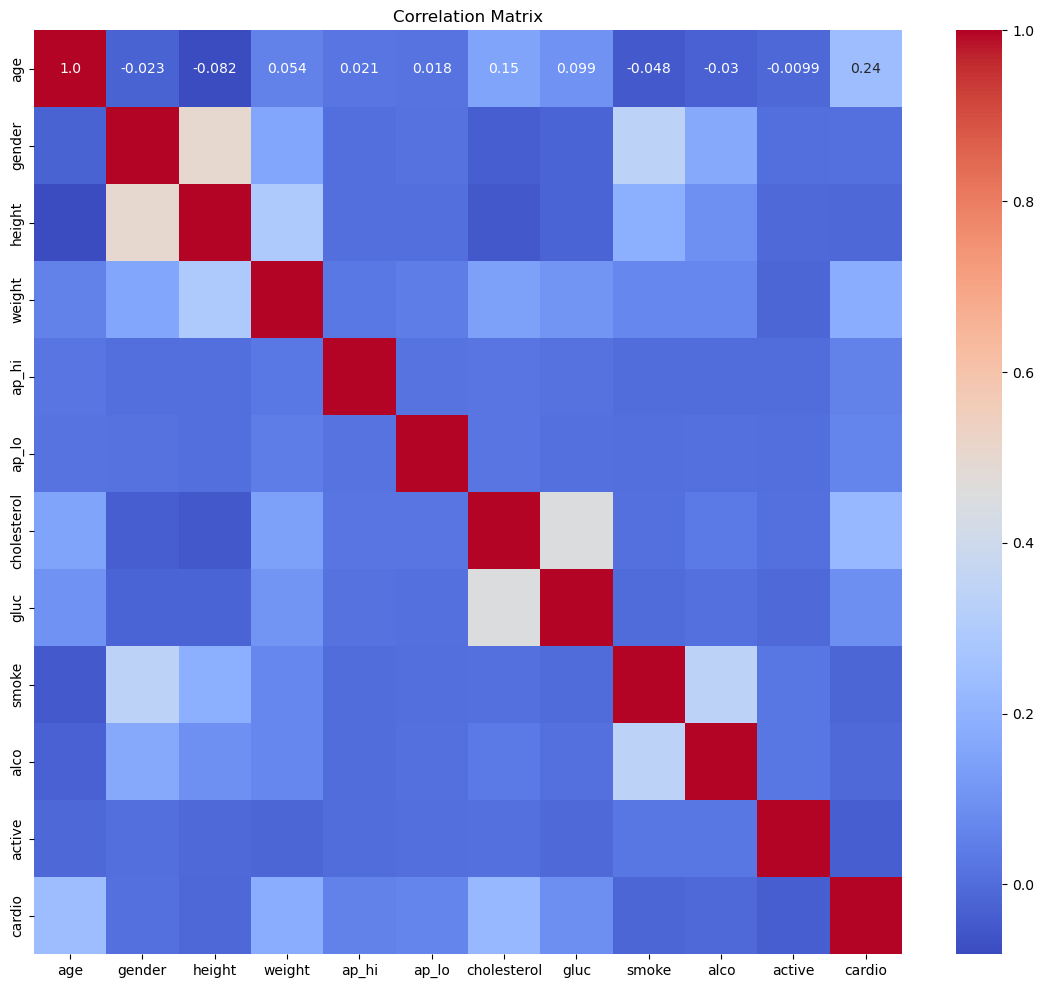

In [12]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), annot=True, fmt='0.2', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

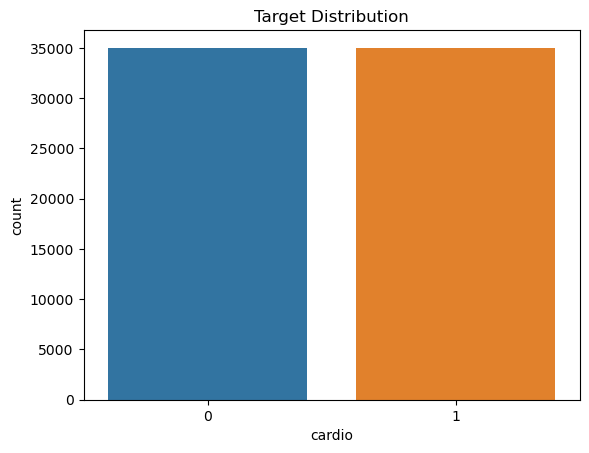

In [13]:
sns.countplot(x='cardio',data=df)
plt.title("Target Distribution")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3,random_state=42)
df['cluster'] = kmeans.fit_predict(x_scaled)

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


In [15]:
print(df['cluster'].value_counts())

cluster
0    36972
1    22158
2    10870
Name: count, dtype: int64


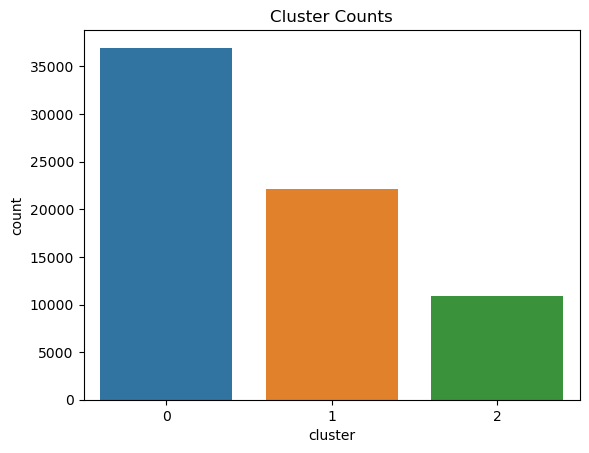

In [16]:
sns.countplot(x='cluster',data=df)
plt.title("Cluster Counts")
plt.show()

In [17]:
models = {
    'SVM' : SVC(),
    'KNN' : KNeighborsClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Logistic Regression' : LogisticRegression(max_iter=1000),
    'Random Forest' : RandomForestClassifier()
}

In [18]:
for name, model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    

In [19]:
accuracy = accuracy_score(y_test,y_pred)
print(f"\n{name} Accuracy:{accuracy:.4f}")
print(f"{name} Classification Report:\n{classification_report(y_test,y_pred)}")


Random Forest Accuracy:0.7139
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



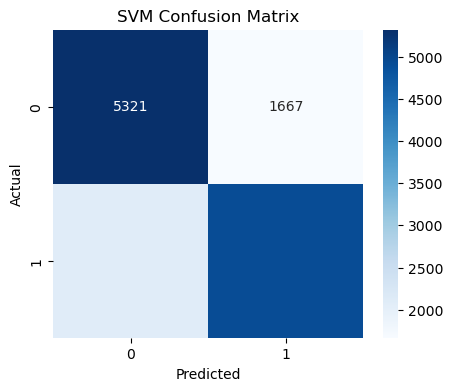

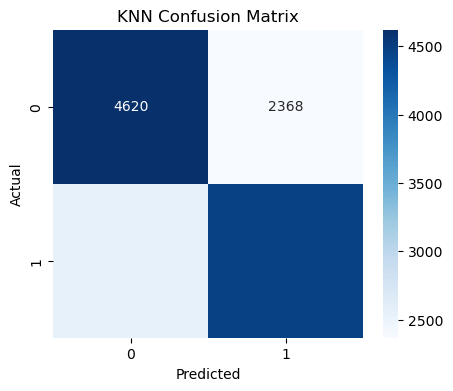

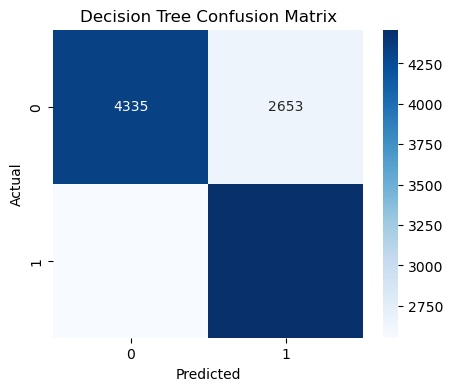

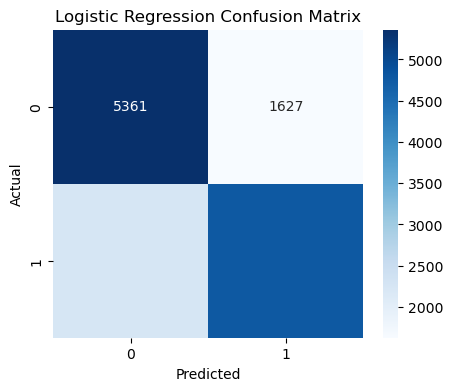

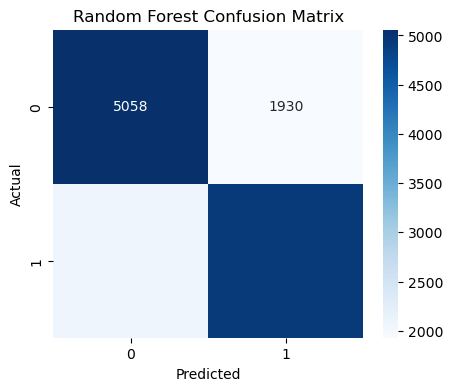

In [20]:
for name,model in models.items():
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [23]:
df.to_csv("output_with_clusters.csv",index=False)
print("File saved as output_with_clusters.csv")

File saved as output_with_clusters.csv


In [26]:
import joblib
joblib.dump(models['Random Forest'],"best_model.pkl")
print(" Best model saved as best_model.pkl")

 Best model saved as best_model.pkl
